In [45]:
import pandas as pd

# Load your file
df = pd.read_excel(r"C:\Users\jelli\OneDrive\Desktop\DSBA 6400\Crown Legacy Stats_FULL.xlsx", sheet_name="Sheet1")

# Clean the dataset by removing the first two non-data rows
df = df.iloc[2:].copy()
df.reset_index(drop=True, inplace=True)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [46]:
# Initial Inspection

df.shape              # Rows and columns
df.info()             # Data types and missing values
df.describe()         # Summary stats for all numeric columns
df.head()             # Peek at first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Columns: 109 entries, Date to PPDA
dtypes: float64(104), object(5)
memory usage: 138.1+ KB


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,Throw ins,Accurate throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA
0,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.0,2.77,17.0,4.0,...,19.0,17.0,89.47,4.0,15.00,4.40,8.28,19.22,21.08,8.58
1,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.0,1.37,11.0,9.0,...,13.0,13.0,100.00,5.0,15.40,2.91,19.34,19.15,22.95,17.67
2,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Crown Legacy FC,4-4-2 (100.0%),0.0,3.62,23.0,5.0,...,26.0,25.0,96.15,2.0,15.72,3.38,9.12,14.93,19.57,8.14
3,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Orlando City B,4-4-2 (100.0%),1.0,0.57,10.0,3.0,...,25.0,22.0,88.00,12.0,15.85,3.95,8.09,20.28,19.37,8.72
4,2025-08-23,Crown Legacy FC - Inter Miami II 6:0,United States. MLS Next Pro,93.0,Crown Legacy FC,4-4-2 (100.0%),6.0,4.85,21.0,13.0,...,28.0,24.0,85.71,5.0,15.62,4.05,8.24,15.65,18.99,11.21


In [47]:
# Check for missing values:

df.isnull().sum().sort_values(ascending=False)


Accurate forward passes          13
% Accurate forward passes        13
Forward passes                   12
Match                             0
Date                              0
                                 ..
Average passes per possession     0
Long pass %                       0
Average shot distance             0
Average pass length               0
PPDA                              0
Length: 109, dtype: int64

In [50]:
# Clean & Prepare

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [49]:
# Ensure numeric columns are actually numeric:

numeric_cols = df.columns.drop(['Date', 'Match', 'Competition', 'Team', 'Scheme'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [51]:
# Targeted Summary Stats Key Metrics

df[['Goals', 'xG', 'Shots', 'Shots on Target', 'Possession, %']].describe()


,Goals,xG,Shots,Shots on Target,"Possession, %"
count,162.000000,162.000000,162.000000,162.000000,162.000000
mean,1.716049,1.657654,12.530864,4.925926,50.000000
std,1.389710,0.915492,4.937086,2.692422,7.452329
min,0.000000,0.030000,2.000000,0.000000,25.200000
25%,1.000000,0.942500,9.000000,3.000000,45.627500
50%,1.000000,1.545000,12.000000,5.000000,50.000000
75%,2.750000,2.165000,15.000000,7.000000,54.372500
max,6.000000,5.280000,27.000000,13.000000,74.800000


In [52]:
# Targeted Summary Stats Duels and Passing

df[['Duels', 'Duels Won', 'Duels Won%', 'Passes', 'Accurate Passes', '% Accurate Passes']].describe()


,Duels,Duels Won,Duels Won%,Passes,Accurate Passes,% Accurate Passes
count,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000
mean,195.938272,95.024691,48.49963,426.518519,359.395062,83.674074
std,27.530377,15.955275,4.47456,85.888431,84.813230,4.472673
min,144.000000,55.000000,37.89000,168.000000,106.000000,63.100000
25%,177.000000,85.000000,45.08750,369.750000,302.250000,81.477500
50%,193.000000,93.000000,48.61000,425.500000,357.500000,84.485000
75%,211.000000,104.750000,51.82500,471.750000,406.000000,86.440000
max,294.000000,156.000000,58.06000,722.000000,669.000000,92.660000


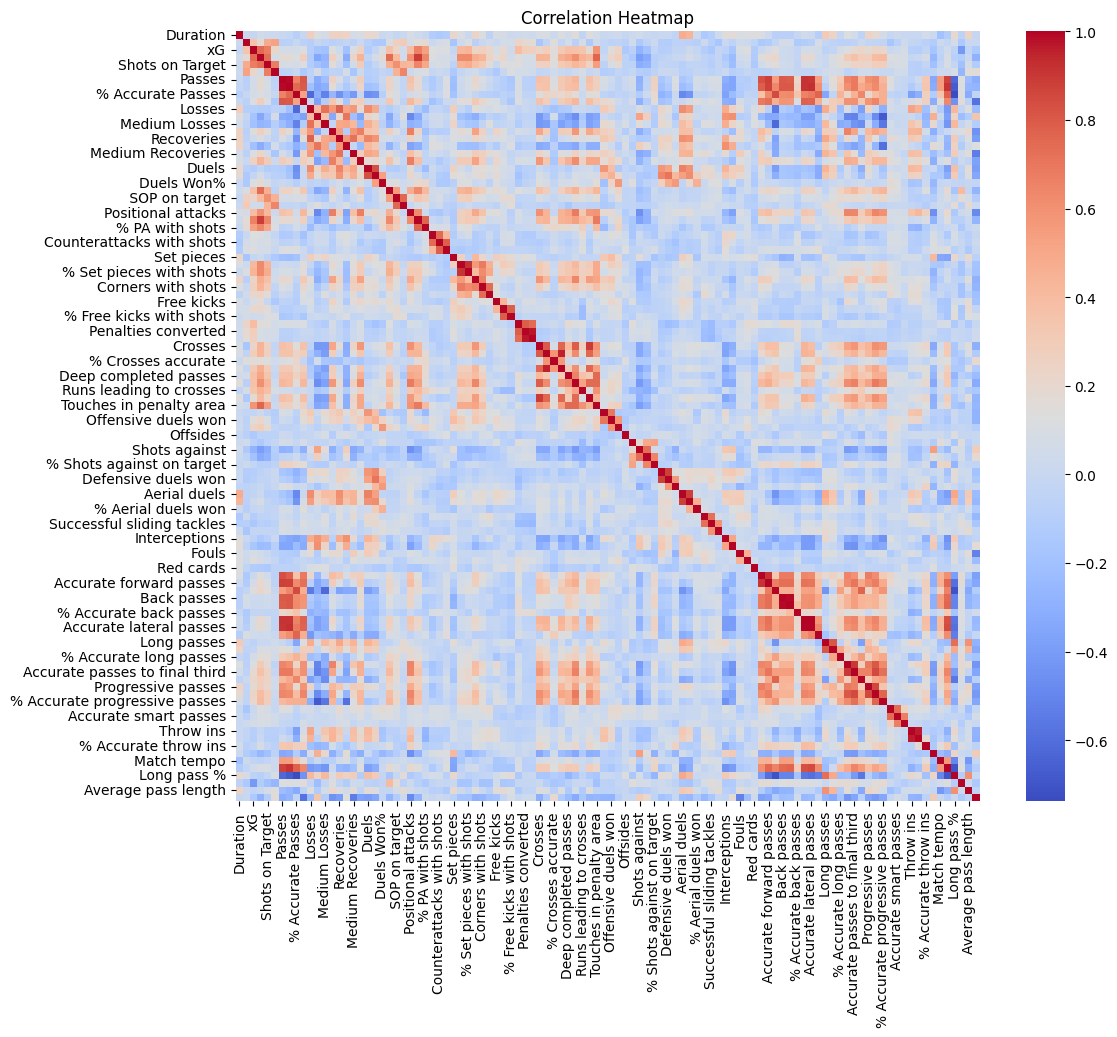

In [53]:
# Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


<Axes: title={'center': 'Goals vs xG Over Time'}, xlabel='Date'>

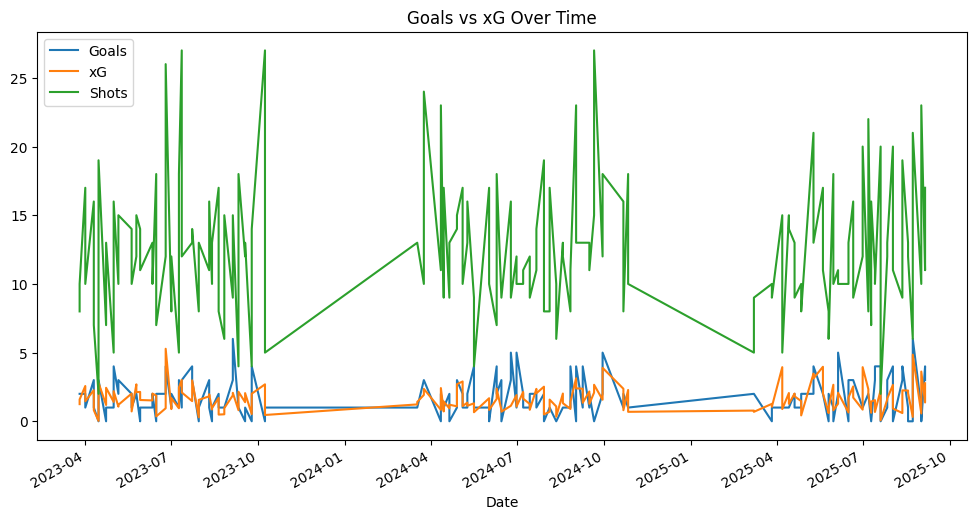

In [11]:
# Time-Based Trends

df.sort_values('Date', inplace=True)
df.set_index('Date')[['Goals', 'xG', 'Shots']].plot(figsize=(12, 6), title='Goals vs xG Over Time')


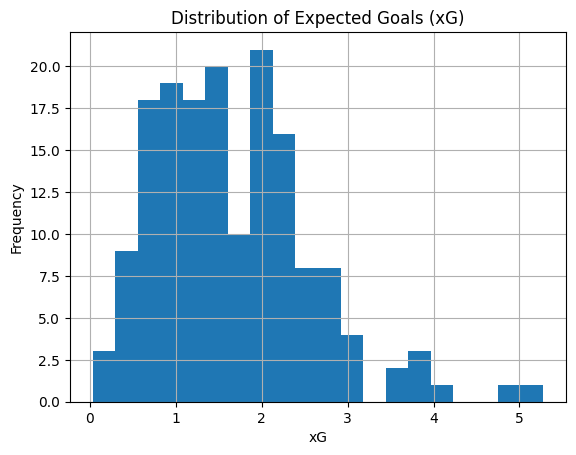

In [12]:
# Distributions & Histograms

df['xG'].hist(bins=20)
plt.title("Distribution of Expected Goals (xG)")
plt.xlabel("xG")
plt.ylabel("Frequency")
plt.show()


In [13]:
# Top Performances / Outliers

df.nlargest(5, 'Goals')[['Match', 'Goals', 'xG']]
df.nsmallest(5, 'PPDA')[['Match', 'PPDA']]  # Most aggressive pressing


,Match,PPDA
144,Crown Legacy FC - Philadelphia Union II (P) 2:2,4.18
20,Crown Legacy FC - Orlando City B 2:2 (P),4.95
114,Crown Legacy FC - New York RB II (P) 1:1,5.23
103,Chicago Fire II - Crown Legacy FC 2:0,5.53
53,Cincinnati II - Crown Legacy FC 1:2,5.80


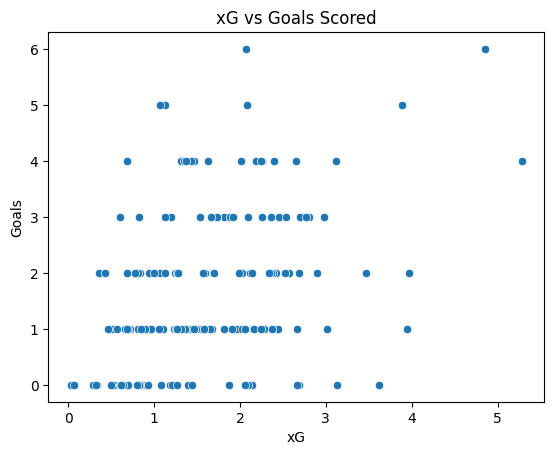

In [14]:
# Relationship Plots

sns.scatterplot(data=df, x='xG', y='Goals')
plt.title("xG vs Goals Scored")
plt.show()


In [15]:
# Grouped Comparisons

df.groupby('Scheme')[['Goals', 'xG', 'Shots']].mean().sort_values(by='Goals', ascending=False)


,Goals,xG,Shots
Scheme,,,
4-2-3-1 (85.14%),5.0,1.13,9.0
4-3-3 (91.9%),4.0,1.43,11.0
4-1-3-2 (49.59%),4.0,1.63,7.0
4-4-2 (88.12%),4.0,3.12,13.0
4-3-3 (68.23%),3.0,2.98,14.0
...,...,...,...
4-4-1-1 (97.47%),0.0,1.27,10.0
4-4-2 (51.49%),0.0,0.07,2.0
4-4-2 (49.51%),0.0,0.50,8.0


In [16]:
crown_df = df[df['Team'] == 'Crown Legacy FC'].copy()
crown_df.reset_index(drop=True, inplace=True)


In [17]:
defensive_kpis = [
    'Conceded goals', 'Shots against', 'Shots against on target',
    'Interceptions', 'Clearances', 'Fouls',
    'Sliding tackles', 'Successful sliding tackles', '% Successful sliding tackles',
    'Defensive duels', 'Defensive duels won', '% Defensive duels won',
    'Aerial duels', 'Aerial duels won', '% Aerial duels won',
    'Recoveries', 'Duels', 'Duels Won', 'Duels Won%',
    'PPDA', 'Yellow cards', 'Red cards'
]

crown_def = crown_df[['Date', 'Match', 'Scheme'] + defensive_kpis].copy()


In [18]:
crown_def['Season'] = pd.to_datetime(crown_def['Date']).dt.year


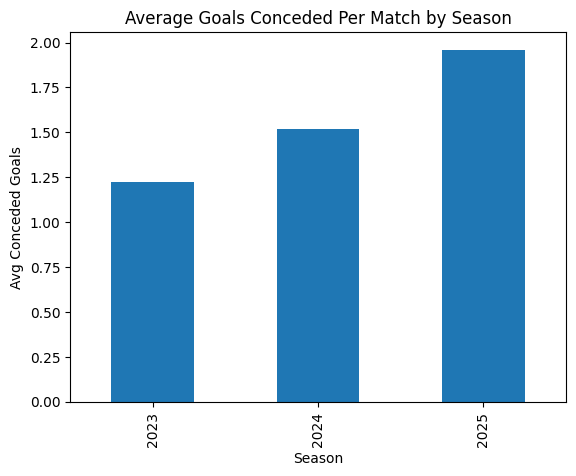

In [19]:
import matplotlib.pyplot as plt

crown_def.groupby('Season')['Conceded goals'].mean().plot(kind='bar')
plt.title('Average Goals Conceded Per Match by Season')
plt.ylabel('Avg Conceded Goals')
plt.xlabel('Season')
plt.show()


In [25]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = crown_def[defensive_kpis].copy()
X = X.dropna()  # drop missing values for modeling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
crown_def['Cluster'] = kmeans.fit_predict(X_scaled)
    

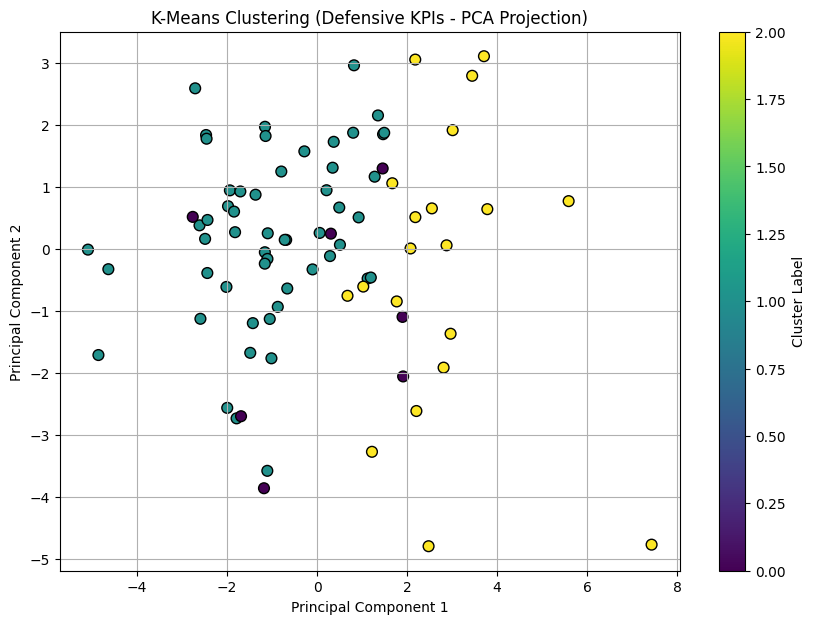

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Add cluster labels to your DataFrame
X_df = pd.DataFrame(X_scaled, columns=defensive_kpis)  # X_scaled is your standardized data
X_df['Cluster'] = kmeans.labels_

# Step 2: Reduce to 2D using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Step 3: Create a plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    principal_components[:, 0],  # PC1
    principal_components[:, 1],  # PC2
    c=X_df['Cluster'],
    cmap='viridis',
    edgecolor='k',
    s=60
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (Defensive KPIs - PCA Projection)')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


In [30]:
df_cl_only = df[df['Team'] == 'Crown Legacy FC'].copy()
df_cl_only['Cluster'] = kmeans.labels_

# Now summarize clusters
cluster_summary = df_cl_only.groupby('Cluster')[defensive_kpis].mean()
display(cluster_summary)


,Conceded goals,Shots against,Shots against on target,Interceptions,Clearances,Fouls,Sliding tackles,Successful sliding tackles,% Successful sliding tackles,Defensive duels,...,Aerial duels,Aerial duels won,% Aerial duels won,Recoveries,Duels,Duels Won,Duels Won%,PPDA,Yellow cards,Red cards
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.428571,18.571429,7.285714,43.714286,18.857143,12.571429,3.571429,2.142857,70.952857,73.571429,...,23.428571,8.571429,38.187143,70.285714,197.00000,95.285714,48.512857,12.718571,2.571429,1.000000
1,1.407407,10.981481,4.444444,32.481481,11.074074,13.666667,3.296296,1.555556,47.689630,71.185185,...,20.851852,9.148148,43.860926,68.000000,183.87037,86.925926,47.351852,11.237407,2.444444,0.055556
2,1.650000,11.400000,4.600000,42.500000,16.200000,14.650000,4.850000,2.700000,52.938000,78.150000,...,38.250000,17.500000,47.387500,87.200000,228.15000,109.750000,48.290000,8.281000,2.250000,0.050000


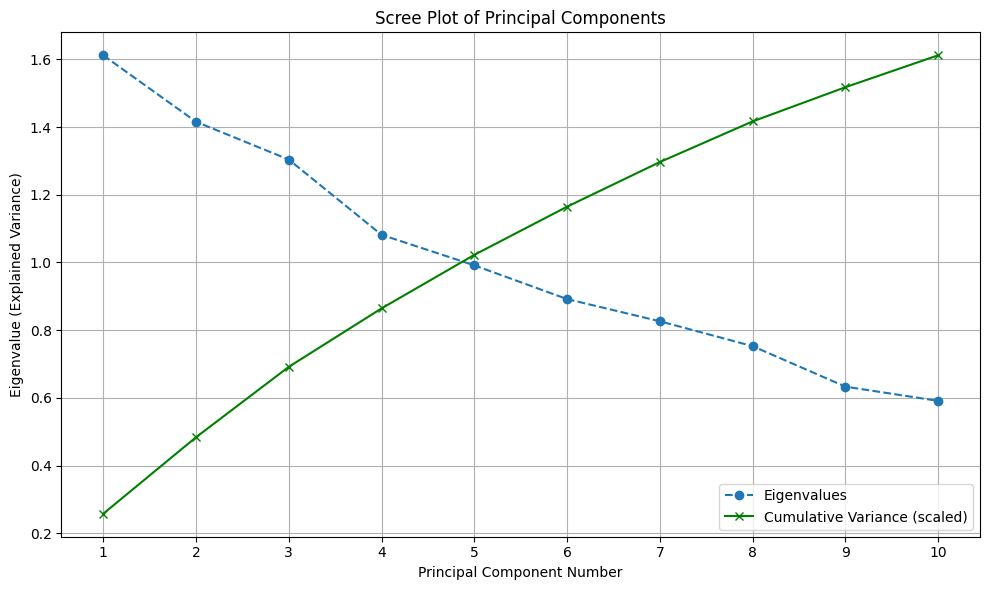

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Load your actual dataset here (replace this with your defensive features)
# Example below is dummy data — replace with your real DataFrame
# data = df_cl_only[defensive_kpis].dropna()  # Use this in your real notebook

# TEMP dummy data for testing
data = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Run PCA
pca = PCA(n_components=None)
pca.fit(scaled_data)

# 4. Explained variance (eigenvalues)
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# 5. Scree Plot
plt.figure(figsize=(10, 6))
components = np.arange(1, len(eigenvalues) + 1)

plt.plot(components, eigenvalues, marker='o', linestyle='--', label='Eigenvalues')
plt.plot(components, cumulative_variance * max(eigenvalues), marker='x', linestyle='-', color='green', label='Cumulative Variance (scaled)')

plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.xticks(components)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


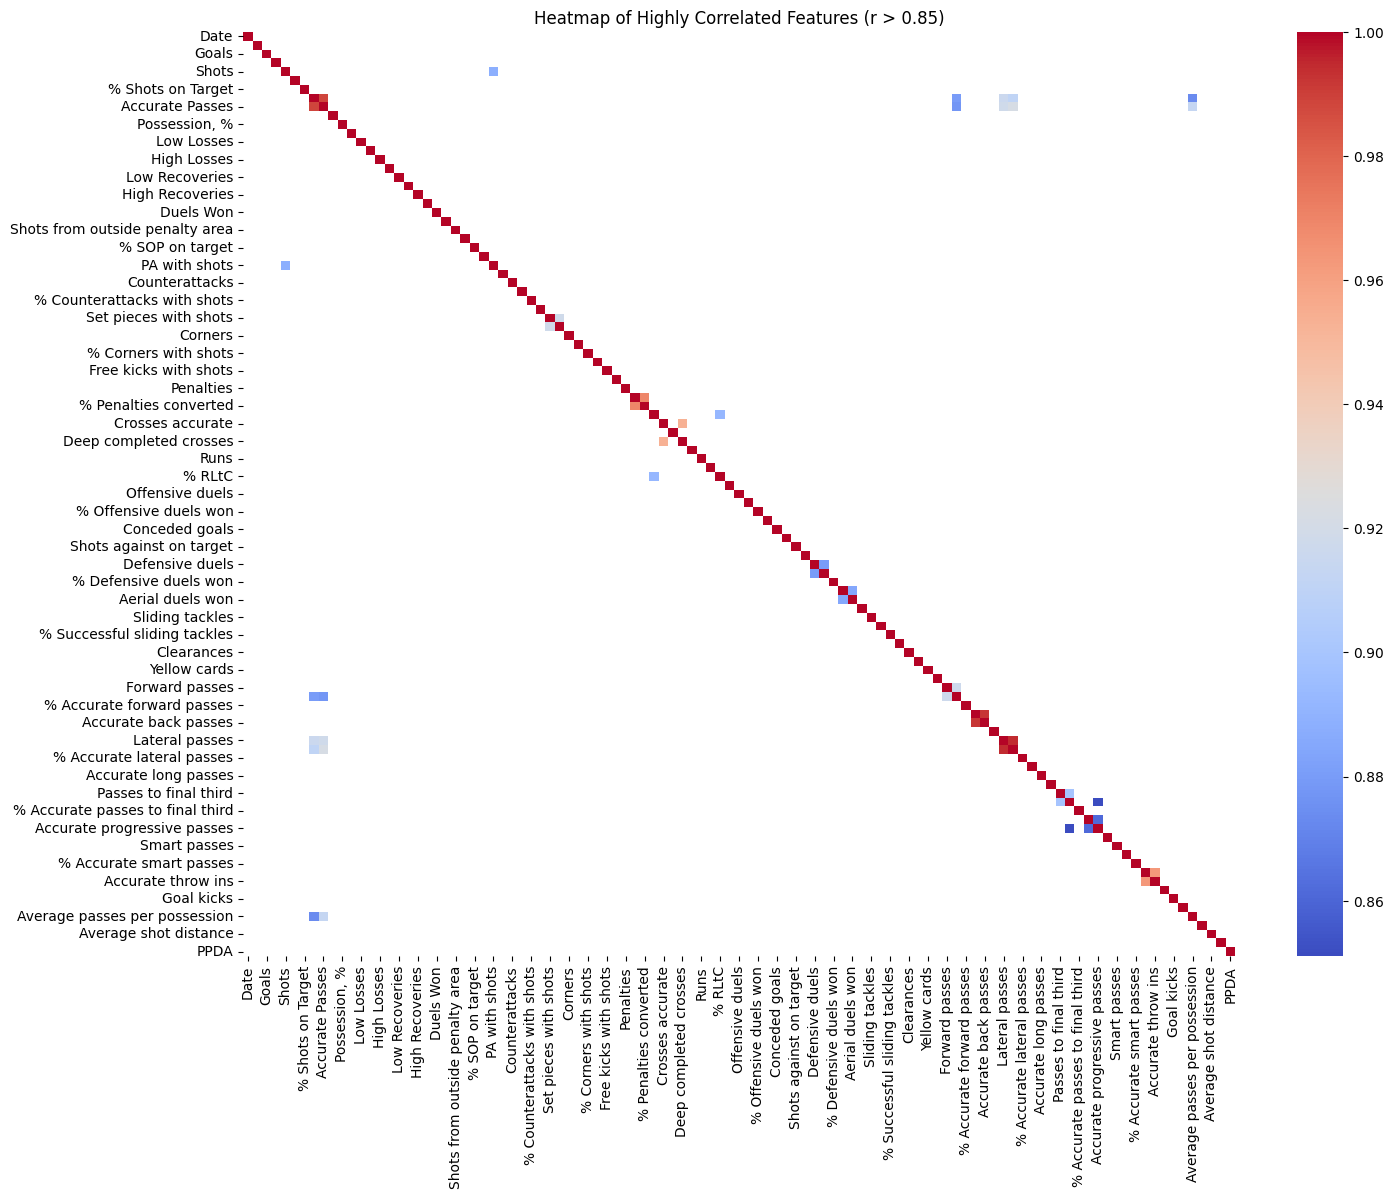

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert all columns to numeric if possible (non-convertible ones become NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop non-numeric or mostly NaN columns
df_numeric = df_numeric.dropna(axis=1, thresh=len(df_numeric) * 0.75)

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Plot heatmap for correlations above 0.85
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, mask=(corr_matrix < 0.85), cbar=True)
plt.title("Heatmap of Highly Correlated Features (r > 0.85)")
plt.show()


In [56]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_excel(r"C:\Users\jelli\OneDrive\Desktop\DSBA 6400\Crown Legacy Stats_FULL.xlsx")
df = df.iloc[2:].copy()
df.reset_index(drop=True, inplace=True)

# Convert all columns to numeric if possible (non-convertible ones become NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop mostly NaN columns
df_numeric = df_numeric.dropna(axis=1, thresh=len(df_numeric) * 0.75)

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Unstack the correlation matrix and remove self-correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Drop duplicate pairs (A-B and B-A)
corr_pairs = corr_pairs.drop_duplicates()

# Filter and sort pairs with correlation above threshold (e.g., 0.85)
high_corr = corr_pairs[corr_pairs > 0.85].sort_values(ascending=False)

# Display the top correlated feature pairs
pd.set_option('display.max_rows', 100)  # show more rows if needed
display(high_corr)


Lateral passes                  Accurate lateral passes           0.994567
Back passes                     Accurate back passes              0.992273
Passes                          Accurate Passes                   0.988535
Penalties converted             % Penalties converted             0.969743
Throw ins                       Accurate throw ins                0.962778
Crosses accurate                Deep completed crosses            0.953293
Accurate Passes                 Accurate lateral passes           0.921581
Set pieces with shots           % Set pieces with shots           0.918286
Accurate Passes                 Lateral passes                    0.918058
Forward passes                  Accurate forward passes           0.917364
Passes                          Lateral passes                    0.915831
Accurate Passes                 Average passes per possession     0.912916
Passes                          Accurate lateral passes           0.910751
Passes to final third    

In [57]:
import numpy as np

# Step 1: Recalculate correlation matrix (if not already in memory)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr().abs()

# Step 2: Get highly correlated feature pairs
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature_1", "level_1": "Feature_2", 0: "Correlation"})
    .query("Correlation > 0.85")
    .sort_values(by="Correlation", ascending=False)
)

# Step 3: Logic to drop one feature from each pair
drop_keywords = ['accurate', '%', 'converted']

features_to_drop = []
for _, row in high_corr_pairs.iterrows():
    f1, f2 = row['Feature_1'], row['Feature_2']
    f1_lower = f1.lower()
    f2_lower = f2.lower()
    
    f1_has_keyword = any(keyword in f1_lower for keyword in drop_keywords)
    f2_has_keyword = any(keyword in f2_lower for keyword in drop_keywords)
    
    if f2_has_keyword and not f1_has_keyword:
        features_to_drop.append(f2)
    elif f1_has_keyword and not f2_has_keyword:
        features_to_drop.append(f1)
    # If both or neither match, you can add custom logic or skip

# Show the list of features recommended for dropping
print("🔻 Features suggested for removal due to high correlation:\n")
for feature in sorted(set(features_to_drop)):
    print("-", feature)


🔻 Features suggested for removal due to high correlation:

- % RLtC
- % Set pieces with shots
- Accurate Passes
- Accurate back passes
- Accurate forward passes
- Accurate lateral passes
- Accurate passes to final third
- Accurate progressive passes
- Accurate throw ins
- Crosses accurate


In [58]:
df_reduced = df.drop(columns=set(features_to_drop))


In [43]:
# Display the first few rows to inspect the data
print("Preview of df_reduced:")
display(df_reduced.head())

# Get the shape of the DataFrame
print(f"\n df_reduced shape: {df_reduced.shape} (rows, columns)")

# List remaining column names
print("\n Remaining columns:")
for col in df_reduced.columns:
    print("-", col)


Preview of df_reduced:


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,% Accurate smart passes,Throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA
0,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.0,2.77,17.0,4.0,...,100.0,19.0,89.47,4.0,15.00,4.40,8.28,19.22,21.08,8.58
1,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.0,1.37,11.0,9.0,...,0.0,13.0,100.00,5.0,15.40,2.91,19.34,19.15,22.95,17.67
2,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Crown Legacy FC,4-4-2 (100.0%),0.0,3.62,23.0,5.0,...,0.0,26.0,96.15,2.0,15.72,3.38,9.12,14.93,19.57,8.14
3,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Orlando City B,4-4-2 (100.0%),1.0,0.57,10.0,3.0,...,0.0,25.0,88.00,12.0,15.85,3.95,8.09,20.28,19.37,8.72
4,2025-08-23,Crown Legacy FC - Inter Miami II 6:0,United States. MLS Next Pro,93.0,Crown Legacy FC,4-4-2 (100.0%),6.0,4.85,21.0,13.0,...,0.0,28.0,85.71,5.0,15.62,4.05,8.24,15.65,18.99,11.21



 df_reduced shape: (162, 99) (rows, columns)

 Remaining columns:
- Date
- Match
- Competition
- Duration
- Team
- Scheme
- Goals
- xG
- Shots
- Shots on Target
- % Shots on Target
- Passes
- % Accurate Passes
- Possession, %
- Losses
- Low Losses
- Medium Losses
- High Losses
- Recoveries
- Low Recoveries
- Medium Recoveries
- High Recoveries
- Duels
- Duels Won
- Duels Won%
- Shots from outside penalty area
-  SOP on target
- % SOP on target
- Positional attacks
- PA with shots
- % PA with shots
- Counterattacks
- Counterattacks with shots
- % Counterattacks with shots
- Set pieces
- Set pieces with shots
- Corners
- Corners with shots
- % Corners with shots
- Free kicks
- Free kicks with shots
- % Free kicks with shots
- Penalties
- Penalties converted
- % Penalties converted
- Crosses
- % Crosses accurate
- Deep completed crosses
- Deep completed passes
- Runs
- Runs leading to crosses
- Touches in penalty area
- Offensive duels
- Offensive duels won
- % Offensive duels won
- Offs

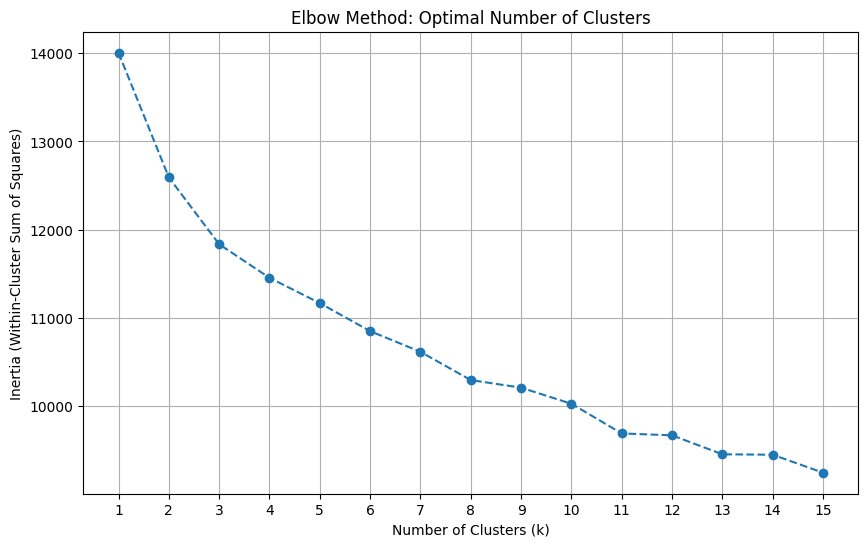

In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Select numeric data only
df_cluster = df_reduced.select_dtypes(include='number')

# Step 2: Drop rows with missing values (only for clustering purposes)
df_cluster_clean = df_cluster.dropna()

# Step 3: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster_clean)

# Step 4: Elbow method
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Step 5: Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(k_range)
plt.show()


In [61]:
# There's a sharp drop in inertia from k=1 to k=3.
# The decrease becomes more gradual between k=4 and k=6.
# After k=6 or 7, the curve flattens quite a bit, indicating diminishing returns as more clusters are added.

In [62]:
# k = 4
# This gives a nice balance between simplicity and insight without overcomplicating the clusters.


In [64]:
# 2b. Drop rows with missing values before PCA
df_cleaned = df_reduced.dropna().reset_index(drop=True)

# 3. Extract numeric features and scale
numeric_cols = df_cleaned.select_dtypes(include='number').columns
X = df_cleaned[numeric_cols]
scaled_X = scaler.fit_transform(X)

# 4. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)

# 5. KMeans clustering (use k=4 or your preferred number)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_X)

# 6. Add cluster labels and PCA components back to the DataFrame
df_cleaned['Cluster'] = clusters
df_cleaned['PC1'] = X_pca[:, 0]
df_cleaned['PC2'] = X_pca[:, 1]


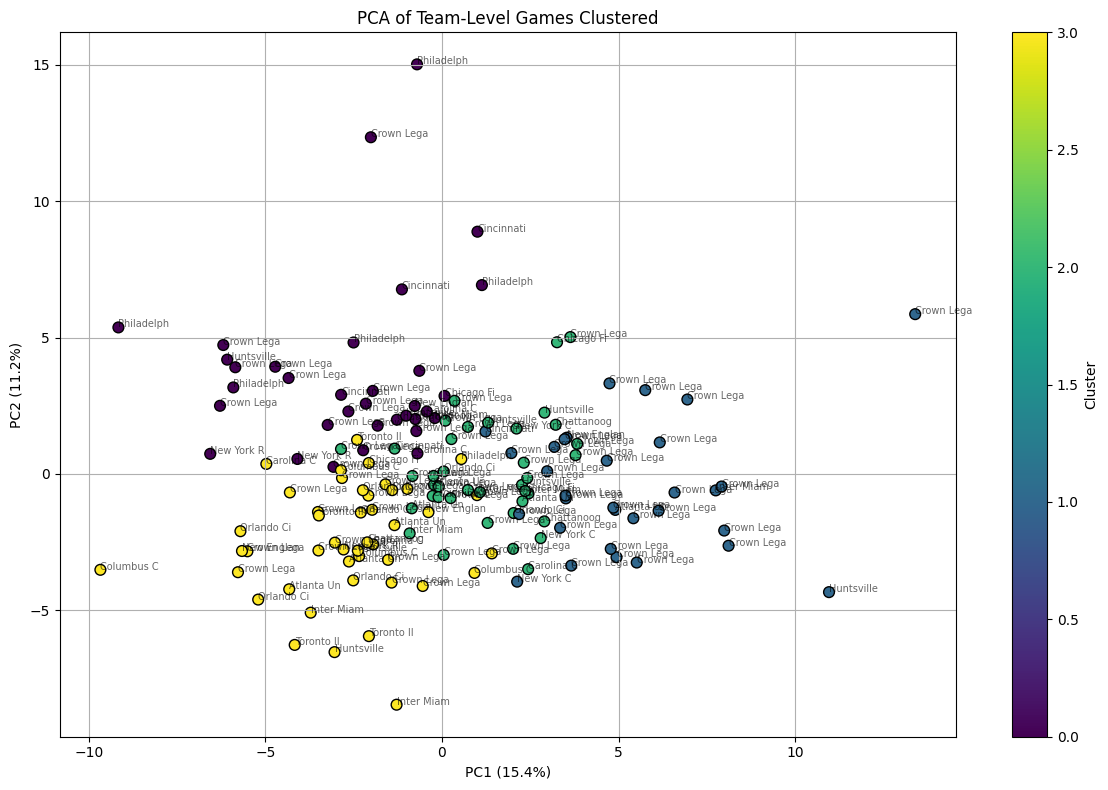

In [65]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_cleaned['PC1'], df_cleaned['PC2'],
                      c=df_cleaned['Cluster'], cmap='viridis', s=60, edgecolor='k')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA of Team-Level Games Clustered')
plt.colorbar(scatter, label='Cluster')

# Optional: label points with team or match
for i, row in df_cleaned.iterrows():
    label = f"{row['Team'][:10]}"
    plt.text(row['PC1'], row['PC2'], label, fontsize=7, alpha=0.6)

plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
# Defensive KPI's that are also relevant features (based on correlation analysis):


# - Conceded goals  
# - Shots against  
# - Shots against on target  
# - Interceptions  
# - Clearances  
# - Fouls  
# - Sliding tackles  
# - Successful sliding tackles  
# - % Successful sliding tackles  
# - Defensive duels  
# - Defensive duels won  
# - % Defensive duels won  
# - Aerial duels  
# - Aerial duels won  
# - % Aerial duels won  
# - Recoveries  
# - Duels  
# - Duels Won  
# - Duels Won%  
# - PPDA  
# - Yellow cards  
# - Red cards  


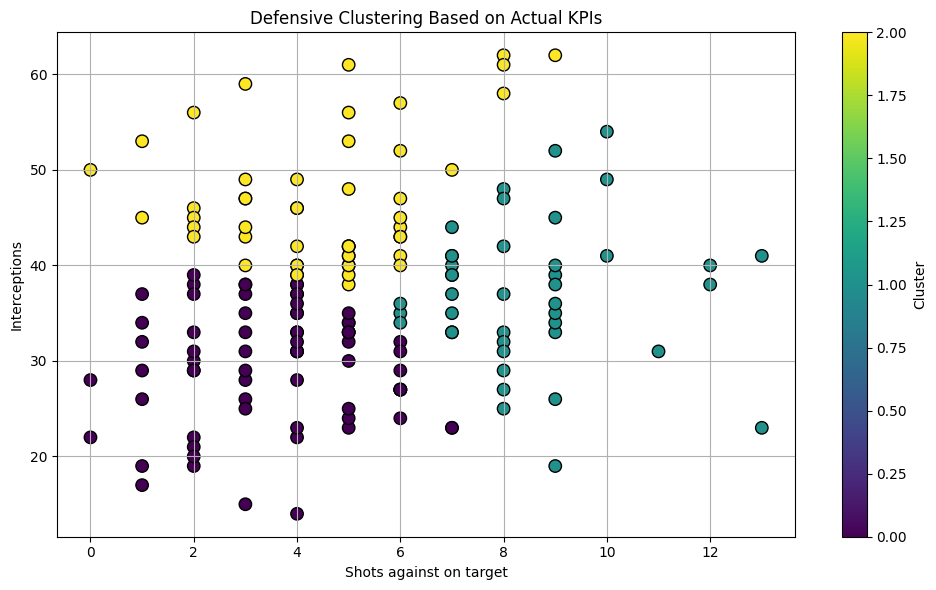

In [68]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select the two KPI columns
x_kpi = 'Shots against on target'
y_kpi = 'Interceptions'
data_kpis = df_reduced[[x_kpi, y_kpi]].dropna()

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_kpis)

# 3. Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_data)

# 4. Add cluster labels back to the original (unscaled) DataFrame
data_kpis['Cluster'] = labels

# 5. Plot with ACTUAL KPI names on axes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data_kpis[x_kpi],
    data_kpis[y_kpi],
    c=data_kpis['Cluster'],
    cmap='viridis',
    edgecolor='k',
    s=80
)

plt.xlabel(x_kpi)
plt.ylabel(y_kpi)
plt.title('Defensive Clustering Based on Actual KPIs')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


Average silhouette score for n_clusters = 4 : 0.08605715354657241


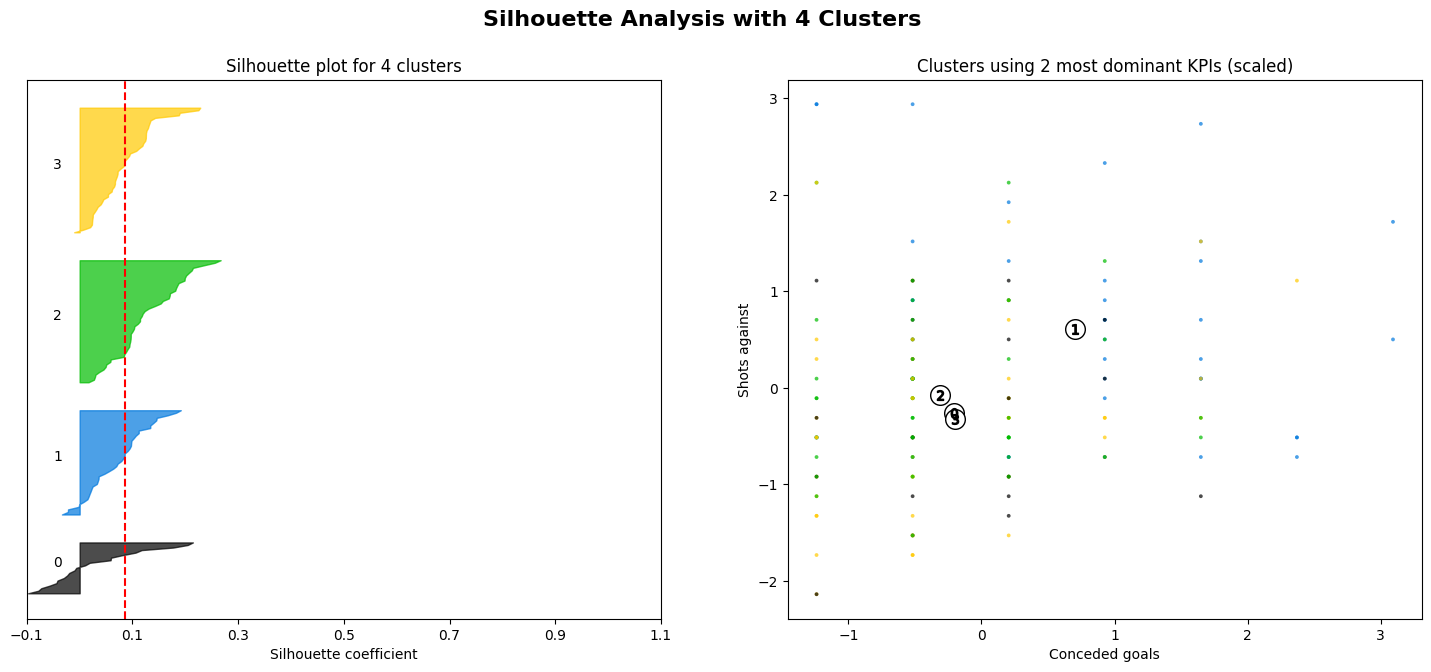

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Load data
# df = pd.read_excel("Crown Legacy Stats_FULL.xlsx")

# Defensive KPIs only
defensive_kpis = [
    'Conceded goals', 'Shots against', 'Shots against on target',
    'Interceptions', 'Clearances', 'Fouls',
    'Sliding tackles', 'Successful sliding tackles', '% Successful sliding tackles',
    'Defensive duels', 'Defensive duels won', '% Defensive duels won',
    'Aerial duels', 'Aerial duels won', '% Aerial duels won',
    'Recoveries', 'Duels', 'Duels Won', 'Duels Won%',
    'PPDA', 'Yellow cards', 'Red cards'
]

# Filter dataset
df_kpis = df[defensive_kpis].copy()

# Drop rows with any missing values
df_kpis.dropna(inplace=True)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kpis)

# Silhouette analysis for n_clusters = 4
n_clusters = 4
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# First subplot — silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = clusterer.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Average silhouette score for n_clusters =", n_clusters, ":", silhouette_avg)

sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for 4 clusters")
ax1.set_xlabel("Silhouette coefficient")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

# Second subplot — scatterplot of clusters using first 2 KPIs
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

centers = clusterer.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("Clusters using 2 most dominant KPIs (scaled)")
ax2.set_xlabel(defensive_kpis[0])
ax2.set_ylabel(defensive_kpis[1])

plt.suptitle("Silhouette Analysis with 4 Clusters", fontsize=16, fontweight='bold')
plt.show()


In [73]:
from sklearn.preprocessing import StandardScaler

# Select your relevant features
features = [
    'Conceded goals', 'Shots against', 'Shots against on target', 
    'Interceptions', 'Clearances', 'Fouls', 'Sliding tackles',
    'Successful sliding tackles', '% Successful sliding tackles',
    'Defensive duels', 'Defensive duels won', '% Defensive duels won',
    'Aerial duels', 'Aerial duels won', '% Aerial duels won',
    'Recoveries', 'Duels', 'Duels Won', 'Duels Won%',
    'PPDA', 'Yellow cards', 'Red cards'
]

X = df[features].copy()

# Convert percentage columns to proportions if needed
percent_cols = [col for col in X.columns if "%" in col]
for col in percent_cols:
    if X[col].max() > 1:
        X[col] /= 100

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [75]:
import numpy as np

# Euclidean distance helper
def euclidean_distance(a,b):
    d = np.sqrt(np.sum((a - b)**2))
    return d

# Custom KMeans class
class Kmeans:
    def __init__(self, k=3, max_iter=100, tol=1e-06):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol

    def pick_centers(self, X):
        centers_idxs = np.random.choice(self.n_samples, self.k)
        return X[centers_idxs]

    def get_closest_centroid(self, x, centroids):
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        return np.argmin(distances)

    def create_clusters(self, centroids, X):
        clusters = [[] for _ in range(self.k)]
        labels = np.empty(self.n_samples)
        for i, x in enumerate(X):
            centroid_idx = self.get_closest_centroid(x, centroids)
            clusters[centroid_idx].append(i)
            labels[i] = centroid_idx
        return clusters, labels

    def compute_centroids(self, clusters, X):
        centroids = np.empty((self.k, self.n_features))
        for i, cluster in enumerate(clusters):
            centroids[i] = np.mean(X[cluster], axis=0)
        return centroids

    def is_converged(self, old_centroids, new_centroids):
        distances = [euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return (sum(distances) < self.tol)

    def fit_predict(self, X):
        self.n_samples, self.n_features = X.shape
        self.centroids = self.pick_centers(X)
        for i in range(self.max_iter):
            self.clusters, self.labels = self.create_clusters(self.centroids, X)
            new_centroids = self.compute_centroids(self.clusters, X)
            if self.is_converged(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def clustering_errors(self, X):
        cluster_values = [X[cluster] for cluster in self.clusters]
        squared_distances = []
        for i, cluster_array in enumerate(cluster_values):
            squared_distances.append(np.sum((cluster_array - self.centroids[i])**2))
        total_error = np.sum(squared_distances)
        return total_error


C:\Users\jelli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\_core\fromnumeric.py:3859: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jelli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\_core\_methods.py:136: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


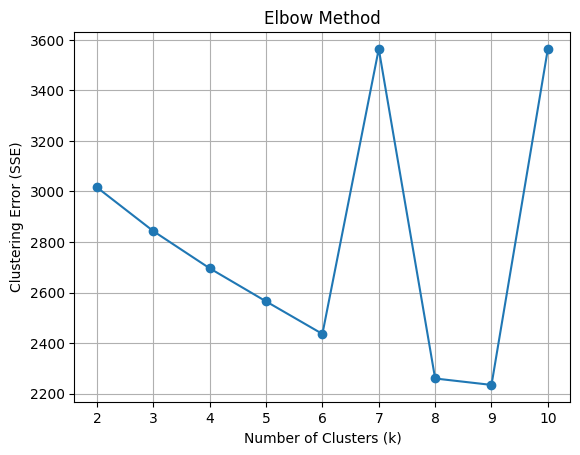

In [76]:
errors = []
for k in range(2, 11):
    model = Kmeans(k=k)
    model.fit_predict(X_scaled)
    error = model.clustering_errors(X_scaled)
    errors.append(error)

# Plot Elbow
plt.plot(range(2, 11), errors, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Clustering Error (SSE)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


In [77]:
# Assign clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze average features by cluster
cluster_summary = df.groupby('Cluster')[features].mean()


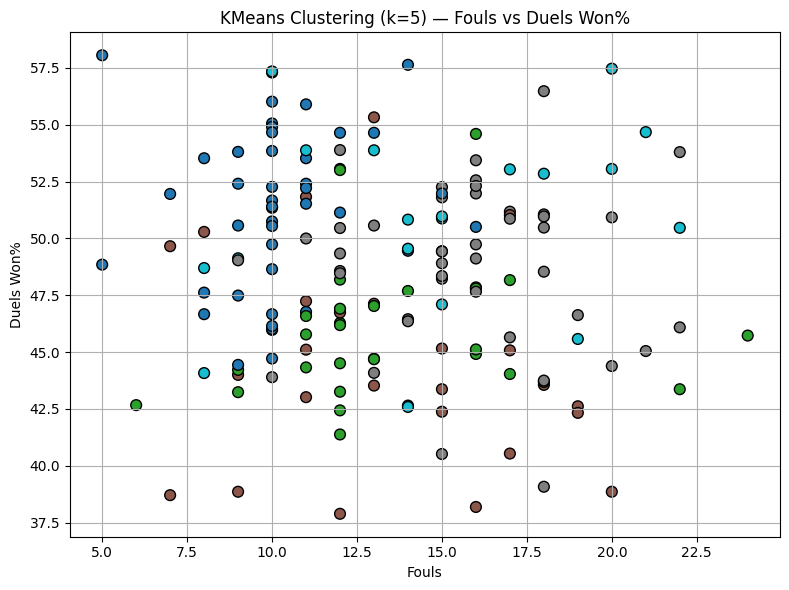

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Choose the number of clusters 
k = 5

# Run KMeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Attach labels to the original (unscaled) data
df_clustered = df.copy()
df_clustered['Cluster'] = labels

# Pick two KPIs to visualize
x_kpi = 'Fouls'
y_kpi = 'Duels Won%'

# Scatter Plot using actual KPI values
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_clustered[x_kpi],
    df_clustered[y_kpi],
    c=df_clustered['Cluster'],
    cmap='tab10',
    s=60,
    edgecolor='black'
)

plt.title(f'KMeans Clustering (k={k}) — {x_kpi} vs {y_kpi}')
plt.xlabel(x_kpi)
plt.ylabel(y_kpi)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans

# Use standardized KPI data
k = 4  # or change to 5 for comparison
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = labels


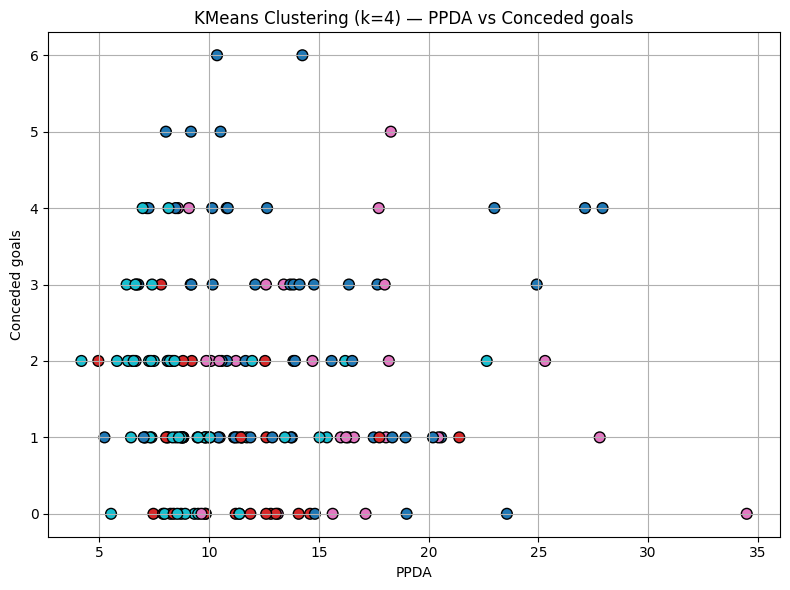

In [83]:
import matplotlib.pyplot as plt

x_kpi = 'PPDA'
y_kpi = 'Conceded goals'

plt.figure(figsize=(8, 6))
plt.scatter(
    df_clustered[x_kpi],
    df_clustered[y_kpi],
    c=df_clustered['Cluster'],
    cmap='tab10',
    s=60,
    edgecolors='k'
)
plt.title(f'KMeans Clustering (k={k}) — {x_kpi} vs {y_kpi}')
plt.xlabel(x_kpi)
plt.ylabel(y_kpi)
plt.grid(True)
plt.tight_layout()
plt.show()


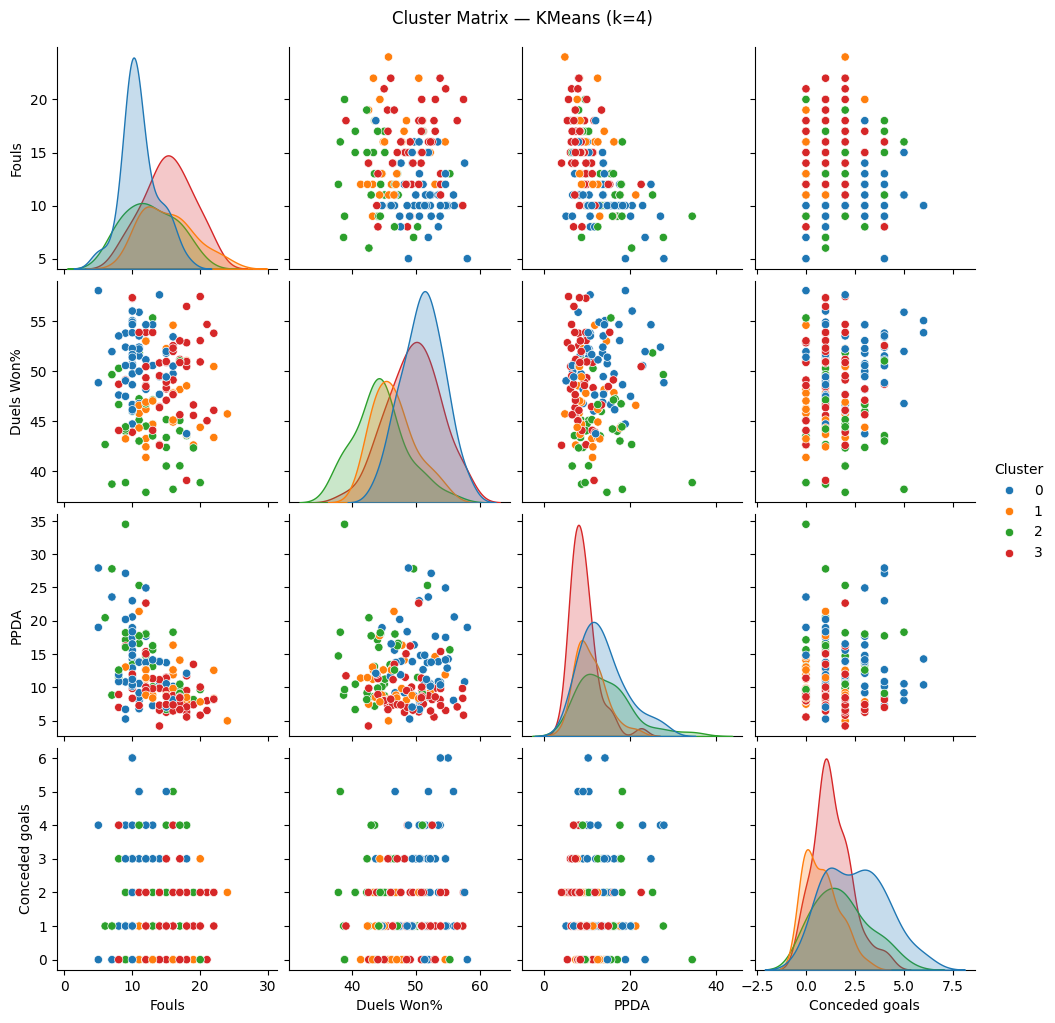

In [84]:
import seaborn as sns

selected_kpis = ['Fouls', 'Duels Won%', 'PPDA', 'Conceded goals']
sns.pairplot(df_clustered[selected_kpis + ['Cluster']], hue='Cluster', palette='tab10')
plt.suptitle(f'Cluster Matrix — KMeans (k={k})', y=1.02)
plt.show()
